# Assignment 2: EEG and Event-Related Potentials

Please submit this assignment to Canvas as a Jupyter notebook (.ipynb). The assignment begins with introductory material interspersed with optional (but recommended) exercises which will not be graded. The graded assignment may be found at the bottom of the document in the section labeled "Assignment X".

## Working with EEG data
We learned how to load basic information about CML experiments and experimental events. Next, we're going to load EEG/iEEG data that correspond to those events.

### What is EEG?
Before we get into the weeds, let's briefly review exactly what EEG is, how we collect it, and what we can learn from it. Much of this material is sourced from this paper by Pesaran, et al. (2018): https://www.nature.com/articles/s41593-018-0171-8

The fundamental signal detected by any electrical brain sensor is the **field potential**, or the change in extracellular voltage induced by aggregated electrical currents across a population of neurons. In other words, as neurons communicate with one another, ions flow across channels at synapses (and along the axon during action potentials). These ionic flows set up a difference in the electrical potential between two areas of brain tissue, which is detected by a sensor placed within the brain (iEEG/sEEG), on the cortical surface (ECoG), or on the scalp (EEG). 

Typically, we refer to the **local field potential (LFP)** when we're talking about field potentials detected by electrodes inserted directly into brain tissue -- such as stereo-EEG depth electrodes -- and **electrocorticography (ECoG)** when we're talking about field potentials detected by electrodes that sit on the surface of the brain. Often, you'll find both of these types of signals in one patient. 

<br>
<center>
<img src="https://media.springernature.com/m685/springer-static/image/art%3A10.1038%2Fs41593-018-0171-8/MediaObjects/41593_2018_171_Fig1_HTML.jpg" width=400>
</center>

The exact neural source of a field potential is not always clear, and it can depend on the placement of an electrode relative to the underlying geometry of neurons and their component parts. For example, a scalp EEG electrode is detecting a field potential generated by the activity of millions of cells in a broad area of the brain near the electrode -- and filtered through the skull and scalp -- while a depth electrode placed in the hippocampus directly records the activity from only a few thousand cells.

The synchronized activity of many cells near an electrode gives rise to an **oscillation**, or a rhythmic fluctuation of the field potential at a particular frequency. The presence of an oscillation is thought to indicate the coordinated neural activity of (or inputs to) a given region, but their origins are multifactorial. Oscillations themselves can affect the firing of neurons, making them an important phenomenon to study in the context of cognition and behavior. We'll talk more about oscillations tomorrow. 

### Invasive Monitoring for Epilepsy Surgery

<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/iEEG_methods-01.jpg?raw=true" width=700>
</center>

Why do we collect EEG? Noninvasive methods, such as scalp EEG and MEG, are safe to use on healthy people. But invasive recordings such as stereo-EEG and ECoG must be justified with a clinical need. Patients with medication-resistant epilepsy come to the hospital for surgical treatment of their epilepsy, in which epileptogenic brain tissue is ablated or removed. But in order to precisely localize this tissue, patients undergo monitoring during which EEG signals are recorded intracranially for several days or weeks, until sufficient seizure events are documented. 

* **(A)** shows a craniotomy, during which a part of the skull is removed so that a grid or strip electrode can be placed on the cortical surface. This method was more common several years ago, and comprises the bulk of early RAM and pre-RAM datasets. 
* **(B)** is a CT-MRI fusion depecting a depth electrode placed in the MTL. So-called "stereo-EEG" depth electrodes are far less invasive, since even a tiny hole in the skull is sufficient to slip one of these wires through. Nowadays, many patients are exclusively stereo-EEG. 

### Load the data

In [1]:
import pandas as pd
import cmlreaders as cml

# We load the dataframe for all sessions.
df = cml.get_data_index()

# Specify which subject and experiment we want
sub = 'R1111M'
exp = 'FR1'

# Select the dataframes for our subject and experiment.
df_select = df[(df['subject']==sub) & (df['experiment']==exp)]
# Pick the first session
df_sess = df_select.iloc[0]

# Initialize data reader using session metadata
reader = cml.CMLReader(subject=df_sess['subject'], experiment=df_sess['experiment'], session=df_sess['session'],
                       localization=df_sess['localization'], montage=df_sess['montage'])

# For first session...
evs = reader.load("events")
word_evs = evs[evs['type']=='WORD']

#### Load subject electrodes

In [2]:
channels = reader.load("pairs")  #loading all bipolar pairs, but can use 'contacts' instead for non-rereferenced data
channels[:10]

,contact_1,contact_2,label,id,is_explicit,is_stim_only,type_1,type_2,avg.region,avg.x,...,wb.x,wb.y,wb.z,stein.region,stein.x,stein.y,stein.z,mni.x,mni.y,mni.z
0,1,9,LPOG1-LPOG9,lpog.1-lpog.9,False,False,G,G,middletemporal,-65.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.28000,-24.47930,-25.704682
1,1,2,LPOG1-LPOG2,lpog.1-lpog.2,False,False,G,G,middletemporal,-66.140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.32435,-20.27770,-20.704405
2,2,10,LPOG2-LPOG10,lpog.2-lpog.10,False,False,G,G,middletemporal,-67.055,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-68.17790,-24.27370,-16.147723
3,2,3,LPOG2-LPOG3,lpog.2-lpog.3,False,False,G,G,middletemporal,-66.335,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-67.85235,-18.97405,-11.785856
4,3,4,LPOG3-LPOG4,lpog.3-lpog.4,False,False,G,G,superiortemporal,-63.665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.81390,-16.24680,-0.170758
5,3,11,LPOG3-LPOG11,lpog.3-lpog.11,False,False,G,G,superiortemporal,-66.210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.49205,-22.66135,-6.117569
6,4,5,LPOG4-LPOG5,lpog.4-lpog.5,False,False,G,G,postcentral,-60.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.88315,-14.75105,11.296800
7,4,12,LPOG4-LPOG12,lpog.4-lpog.12,False,False,G,G,superiortemporal,-63.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-64.42160,-20.69280,4.779624
8,5,6,LPOG5-LPOG6,lpog.5-lpog.6,False,False,G,G,postcentral,-58.595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.15850,-12.24788,20.745970
9,5,13,LPOG5-LPOG13,lpog.5-lpog.13,False,False,G,G,supramarginal,-61.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.59895,-18.82055,16.364520


Some key attributes you may need in your analyses include: 
* label: The clinical label for each electrode, as determined in the hospital
* ind.region: The anatomical region using the Desikan-Killiany atlas. 
* ind.x/y/z: Electrode coordinates in individual FreeSurfer space. 
* avg.x/y/z: Electrode coordintes in average FreeSurfer space. 
* tal.x/y/z or mni.x/y/z: Coordinates in Talairach or MNI space. 
* stein.region or das.region: Manually-confirmed labels for MTL subfields (mostly). Talk to me offline about getting these labels for recent subjects.

(The x axis points to the right, the y axis to the front, and the z axis up.)

* For a full description of fields in 'pairs' or 'contacts' structures, see: https://github.com/pennmem/neurorad_pipeline/blob/master/RELEASE_NOTES.md
* For more information on brain coordinate systems, see: http://www.fieldtriptoolbox.org/faq/how_are_the_different_head_and_mri_coordinate_systems_defined/

**Exercise: Plot the distributions of 'ind' x, y, and z values for all of R1111Ms electrodes.**

Text(0.5, 1.0, 'Channel Z-values')

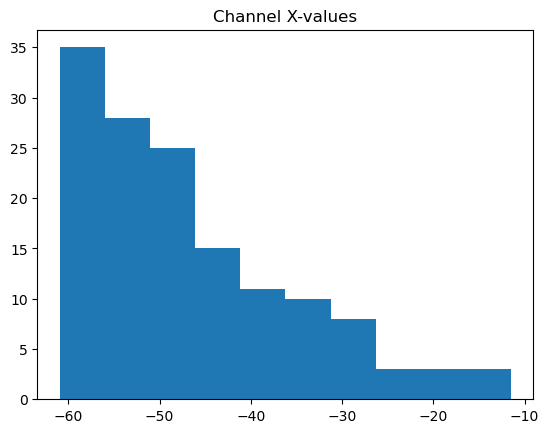

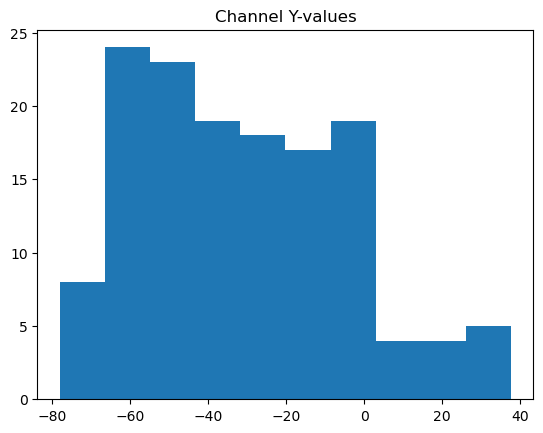

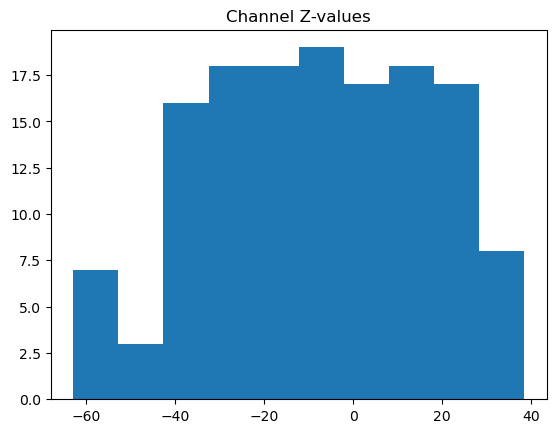

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.hist(channels['ind.x'])
plt.title('Channel X-values')

plt.figure()
plt.hist(channels['ind.y'])
plt.title('Channel Y-values')

plt.figure()
plt.hist(channels['ind.z'])
plt.title('Channel Z-values')


**Exercise: How many electrodes does R1111M have placed in the temporal cortex? How many on the left and how many on the right?**

In [4]:
channels.columns

Index(['contact_1', 'contact_2', 'label', 'id', 'is_explicit', 'is_stim_only',
       'type_1', 'type_2', 'avg.region', 'avg.x', 'avg.y', 'avg.z',
       'avg.dural.region', 'avg.dural.x', 'avg.dural.y', 'avg.dural.z',
       'dk.region', 'dk.x', 'dk.y', 'dk.z', 'ind.region', 'ind.x', 'ind.y',
       'ind.z', 'ind.dural.region', 'ind.dural.x', 'ind.dural.y',
       'ind.dural.z', 'tal.region', 'tal.x', 'tal.y', 'tal.z', 'wb.region',
       'wb.x', 'wb.y', 'wb.z', 'stein.region', 'stein.x', 'stein.y', 'stein.z',
       'mni.x', 'mni.y', 'mni.z'],
      dtype='object')

In [5]:
import numpy as np
n_temporal = np.sum(pd.Series(channels['ind.region']).str.contains('temporal'))
print(f'LTC contacts: {n_temporal} / {len(channels)}')

LTC contacts: 50 / 141


### Load EEG

Loading EEG is pretty simple -- use your reader's **'load_eeg'** method, and pass it an events dataframe, when you want to start/stop the EEG clip (in ms), and the electrodes you want. Use a **'pairs'** dataframe for bipolar data (see below) or a **'contacts'** dataframe for unrereferenced data.

* Note that events and electrodes dataframes must be passed as slices, not individual rows. So index them like 'pairs[0:1]' or 'pairs.loc[0:1]' for the first electrode pair, not 'pairs.loc[0]'. Same goes for events!
* Unrereferenced data is **not available** for subjects collected on the newer RAM ENS system. The ENS inherently records in bipolar fashion (to mitigate stimulation artifact). Passing a 'contacts' structure should yield an error if this is the case. 

In [6]:
reader.load_eeg?

Signature:
reader.load_eeg(
    events: Optional[pandas.core.frame.DataFrame] = None,
    rel_start: int = None,
    rel_stop: int = None,
    scheme: Optional[pandas.core.frame.DataFrame] = None,
    clean: Optional[bool] = False,
)
Docstring:
Load EEG data.

Parameters
----------
events
    Events to load EEG epochs from. Incompatible with passing
    ``epochs``.
rel_start
    Start time in ms relative to passed event onsets. This parameter is
    required when passing events and not used otherwise.
rel_stop
    Stop time in ms relative to passed event onsets. This  parameter is
    required when passing events and not used otherwise.
scheme
    When specified, a bipolar scheme to rereference the data with
    and/or filter by channel. Rereferencing is only possible if the
    data were recorded in monopolar (a.k.a. common reference) mode.
    (Currently available for iEEG only.)
clean
    If True, load re-referenced, filtered, and ICA/LCF-cleaned version
    of data (currently avail

In [7]:
# Grab the EEG data
eeg_container = reader.load_eeg(events=evs, rel_start=0, rel_stop=1600, scheme=channels)
eeg = eeg_container.data
samplingrate = eeg_container.samplerate

/home1/hherrema/.conda/envs/bids/lib/python3.11/site-packages/cmlreaders/readers/eeg.py:563: UserWarning: Some events have eegoffset < 0 and will be dropped.
  warnings.warn("Some events have eegoffset < 0 and will be dropped.")


In [8]:
# The output from this mode is a numpy array of [events, electrodes, samples]
print(eeg.shape)

# Show the EEG data
print(eeg)


(764, 141, 800)
[[[  6153   6163   6173 ...   6080   6074   6067]
  [  7068   7064   7064 ...   7143   7134   7127]
  [ -4876  -4871  -4869 ...  -5025  -5020  -5012]
  ...
  [  7825   7827   7828 ...   7780   7780   7776]
  [-10137 -10133 -10133 ... -10249 -10249 -10246]
  [ -1432  -1435  -1437 ...  -1436  -1432  -1428]]

 [[  6172   6178   6180 ...   6037   6038   6032]
  [  7071   7089   7095 ...   6892   6887   6877]
  [ -4948  -4964  -4969 ...  -4818  -4809  -4797]
  ...
  [  7734   7732   7728 ...   7763   7763   7767]
  [-10265 -10265 -10265 ... -10234 -10233 -10233]
  [ -1429  -1429  -1433 ...  -1394  -1389  -1388]]

 [[  5855   5860   5871 ...   6159   6153   6153]
  [  7030   7031   7037 ...   7151   7145   7137]
  [ -4958  -4961  -4958 ...  -4958  -4958  -4957]
  ...
  [  7693   7699   7712 ...   7770   7769   7773]
  [-10164 -10166 -10170 ... -10205 -10210 -10221]
  [ -1413  -1416  -1419 ...  -1454  -1453  -1448]]

 ...

 [[  6131   6119   6109 ...   6194   6200   6192]
  [ 

In [9]:
# We can immediately filter by word events and channels,
# here selecting channels 0 through 4 (up to but not including the 5):

eeg_filt = eeg[word_evs.index, 0:5]

print(eeg_filt.shape)
print(eeg_filt)

(288, 5, 800)
[[[ 6193  6194  6202 ...  6306  6299  6296]
  [ 7132  7128  7120 ...  7166  7170  7174]
  [-4988 -4987 -4989 ... -4948 -4952 -4967]
  [ 3814  3817  3821 ...  3903  3889  3878]
  [-2088 -2088 -2087 ... -2487 -2492 -2495]]

 [[ 6255  6251  6257 ...  5965  5959  5950]
  [ 7177  7165  7165 ...  7013  7015  7018]
  [-4963 -4962 -4965 ... -5019 -5025 -5034]
  [ 3777  3777  3769 ...  3860  3855  3856]
  [-2045 -2045 -2053 ... -2205 -2209 -2215]]

 [[ 6011  5995  5983 ...  6338  6340  6344]
  [ 7025  7006  6993 ...  7096  7113  7135]
  [-4905 -4902 -4904 ... -4886 -4888 -4895]
  [ 3784  3785  3782 ...  3760  3762  3758]
  [-2196 -2199 -2206 ... -2086 -2109 -2124]]

 ...

 [[ 6658  6642  6631 ...  6269  6256  6248]
  [ 7302  7287  7286 ...  7322  7308  7300]
  [-4897 -4886 -4887 ... -4828 -4818 -4809]
  [ 3821  3825  3820 ...  4056  4055  4050]
  [-2071 -2079 -2089 ... -2571 -2564 -2559]]

 [[ 6055  6047  6042 ...  6104  6095  6084]
  [ 7137  7136  7139 ...  6991  6982  6979]
  [-

In [10]:
# You might instead want the EEG in a PTSA or MNE format.
# These two libraries will be very useful for later analyses.
eeg_ptsa = eeg_container.to_ptsa()
# eeg_mne = eeg_container.to_mne()

In [11]:
# We can select out word events and the first five channels using PTSA, just like the numpy array
eeg_ptsa_filt = eeg_ptsa[word_evs.index, channels.index[0:5]]

# Lets look at the resulting data
print(eeg_ptsa_filt)

<xarray.TimeSeries (event: 288, channel: 5, time: 800)>
array([[[ 6193,  6194,  6202, ...,  6306,  6299,  6296],
        [ 7132,  7128,  7120, ...,  7166,  7170,  7174],
        [-4988, -4987, -4989, ..., -4948, -4952, -4967],
        [ 3814,  3817,  3821, ...,  3903,  3889,  3878],
        [-2088, -2088, -2087, ..., -2487, -2492, -2495]],

       [[ 6255,  6251,  6257, ...,  5965,  5959,  5950],
        [ 7177,  7165,  7165, ...,  7013,  7015,  7018],
        [-4963, -4962, -4965, ..., -5019, -5025, -5034],
        [ 3777,  3777,  3769, ...,  3860,  3855,  3856],
        [-2045, -2045, -2053, ..., -2205, -2209, -2215]],

       [[ 6011,  5995,  5983, ...,  6338,  6340,  6344],
        [ 7025,  7006,  6993, ...,  7096,  7113,  7135],
        [-4905, -4902, -4904, ..., -4886, -4888, -4895],
        [ 3784,  3785,  3782, ...,  3760,  3762,  3758],
        [-2196, -2199, -2206, ..., -2086, -2109, -2124]],

       ...,

       [[ 6658,  6642,  6631, ...,  6269,  6256,  6248],
        [ 730

In [12]:
# # We can also filter the eeg_mne for word events.
# eeg_mne_filt = eeg_mne[word_evs.index]

# # Then we can filter the eeg_mne_filt again for channels.
# eeg_mne_filt = eeg_mne_filt.pick_channels(eeg_mne.ch_names[0:5])

# # Lets observe the remaining dimensions
# print(eeg_mne_filt.get_data().shape)

# # And look at the numpy array of the remaining data
# print(eeg_mne_filt.get_data())


Text(0.5, 1.0, 'Sample EEG trace')

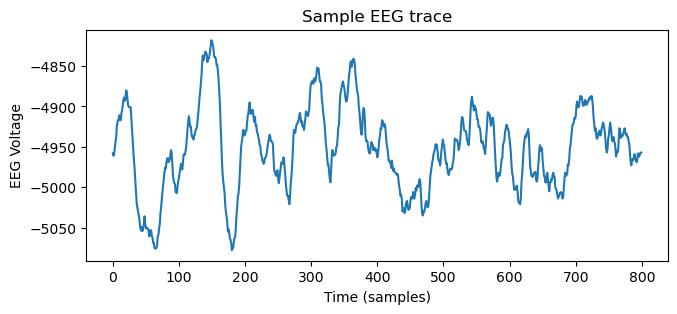

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot an example EEG trace
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(eeg[2, 2, :])
plt.ylabel('EEG Voltage'); plt.xlabel('Time (samples)')
plt.title('Sample EEG trace')

This is the fundamental unit of all of the analyses you'll do in the lab -- the EEG timeseries! Whether from scalp or intracranial, our core interest is understanding the properties of these timeseries relative to interesting behavioral or cognitive events. Typically, we understand EEG signals with **spectral decomposition**, which will be covered in the next assignment.

### Referencing

Electrical potentials inherently reflect some kind of differential. In the case of EEG data, the voltage fluctuations we measure really reflect a difference between an electrode of interest and a "reference" electrode placed elsewhere (such as the mastoid or an arbitrary location in the brain). As such, noise on the reference electrode -- and other sources -- can contaminate our measurement of true neural signal in the raw data. 

To solve this, it is common to "re-reference" EEG data to mitigate sources of noise. We could have a whole discussion about different ways to re-reference data, and the advantages/disadvantages of each, but there are two common ways of re-referencing I'll mention here. 

The most common re-reference used in this lab is the **bipolar** reference, in which the signal from each channel is subtracted from its neighbor. The result is an estimate of a cleaner signal that putatively reflects activity at the midpoint of the two physical recording contacts (we sometimes call this midpoint a **virtual electrode**). The bipolar reference has several advantages: (1) it's very simple to implement, (2) it typically does a good job at removing widespread noise, and (3) it ensures that your re-referenced traces reflect activity that is very close to the original electrodes. 

(One downside is that bipolar re-referencing can actually reduce your ability to detect true neural signals, or mislocalize its origin, especially if two adjancent electrodes were detecting a common source of electrical activity.)

You may also encounter the **common average** reference, in which the average signal across all electrodes (or perhaps within a predefined anatomical region) is subtracted from each. This method is less likely to destroy local signals, and also does a good job removing widespread noise or reference noise, but can potentially contaminate originally-clean electrodes with unmitigated noise from a completely different part of the brain. 

Neither method is perfect, and there are more sophisiticated approaches out there. For the sake of this tutorial, we're going to focus on the bipolar reference. But it is often nice to try different referencing schemes in your analysis to ensure that your results don't change drastically from one to the other. 

<center>
<img src="http://www.bem.fi/book/13/fi/1303.gif">
</center>

In [14]:
# Let's examine the bipolar referencing used in the example data.
# The channels are as follows:
channels = reader.load("pairs")

channels[0:10]

,contact_1,contact_2,label,id,is_explicit,is_stim_only,type_1,type_2,avg.region,avg.x,...,wb.x,wb.y,wb.z,stein.region,stein.x,stein.y,stein.z,mni.x,mni.y,mni.z
0,1,9,LPOG1-LPOG9,lpog.1-lpog.9,False,False,G,G,middletemporal,-65.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.28000,-24.47930,-25.704682
1,1,2,LPOG1-LPOG2,lpog.1-lpog.2,False,False,G,G,middletemporal,-66.140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.32435,-20.27770,-20.704405
2,2,10,LPOG2-LPOG10,lpog.2-lpog.10,False,False,G,G,middletemporal,-67.055,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-68.17790,-24.27370,-16.147723
3,2,3,LPOG2-LPOG3,lpog.2-lpog.3,False,False,G,G,middletemporal,-66.335,...,NaN,NaN,NaN,Left Middle Temporal Gyrus,NaN,NaN,NaN,-67.85235,-18.97405,-11.785856
4,3,4,LPOG3-LPOG4,lpog.3-lpog.4,False,False,G,G,superiortemporal,-63.665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-65.81390,-16.24680,-0.170758
5,3,11,LPOG3-LPOG11,lpog.3-lpog.11,False,False,G,G,superiortemporal,-66.210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-67.49205,-22.66135,-6.117569
6,4,5,LPOG4-LPOG5,lpog.4-lpog.5,False,False,G,G,postcentral,-60.490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.88315,-14.75105,11.296800
7,4,12,LPOG4-LPOG12,lpog.4-lpog.12,False,False,G,G,superiortemporal,-63.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-64.42160,-20.69280,4.779624
8,5,6,LPOG5-LPOG6,lpog.5-lpog.6,False,False,G,G,postcentral,-58.595,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.15850,-12.24788,20.745970
9,5,13,LPOG5-LPOG13,lpog.5-lpog.13,False,False,G,G,supramarginal,-61.135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-63.59895,-18.82055,16.364520


Compare contact_1, contact_2, and the dash separated pairs in the label column.  The bipolar referencing scheme works by subtracting contact_1 from contact_2, and recording that signal in the EEG file.  The brain regions and coordinates identified in the various columns are typically taken from the location in between the two electrodes which make up the bipolar pair.

/home1/hherrema/.conda/envs/bids/lib/python3.11/site-packages/cmlreaders/readers/eeg.py:563: UserWarning: Some events have eegoffset < 0 and will be dropped.
  warnings.warn("Some events have eegoffset < 0 and will be dropped.")


avg.region: cuneus


Text(0, 0.5, 'Z-scored Voltage')

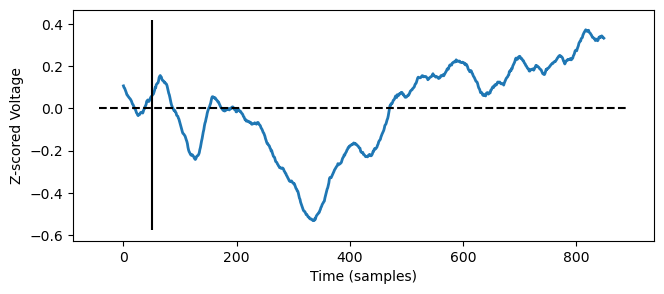

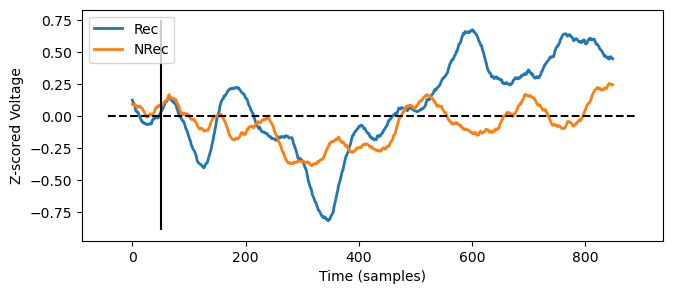

In [15]:
import numpy as np

# Load 1700ms long EEG events from 100ms before event to 1600ms after
eeg_container = reader.load_eeg(evs, -100, 1600, scheme=channels)
eeg = eeg_container.data
sr = eeg_container.samplerate

# Select word encoding events for channel 112 (as a slice), keeping events, channels, time
# Channel 112 is in the cuneus, part of the occipital lobe.
eeg = eeg[word_evs.index, 112:113]
print('avg.region:', channels.iloc[112]['avg.region'])

# Get recalled/not recalled status
# Note, the values are 0 and 1 in the database.  It is essential to turn this into a boolean array
# so that numpy will later process it as a boolean mask, and not as indices of 0 and 1 to repeatedly
# index the eeg with.
rec_status = word_evs['recalled']==True

mu = np.mean(np.mean(eeg[:, 0, :], 1), 0)
std_ = np.std(np.mean(eeg[:, 0, :], 1), 0)

zeeg = (eeg-mu)/std_

# Plot the trace averaged across all events
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[:, 0, :], 0), linewidth=2,)
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

# Plot the trace for rec/nrec separately
plt.figure(figsize=(7.5, 3)); ax=plt.subplot(111)
plt.plot(np.mean(zeeg[rec_status, 0, :], 0), linewidth=2, label='Rec')
plt.plot(np.mean(zeeg[~rec_status, 0, :], 0), linewidth=2, label='NRec')
plt.vlines([0.1*sr], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linestyle='-', color='k')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linestyle='--', color='k')
plt.legend()
plt.xlabel('Time (samples)'); plt.ylabel('Z-scored Voltage')

**Exercise: Plot the ERP in a 2-second span surrounding the recall of each word event for a lateral occipital electrode from the first FR1 session conducted by R1383J. Does our occipital electrode show an effect? What about elsewhere in the brain?**

<span style='color:blue'> *The remainder of this notebook is a brief overview of some univariate statistical concepts and examples that will be useful in this assignment and beyond. Feel free to skip it and begin the assignment if you are already familiar.* </span>

## Statistical Inference, t-tests, and multiple comparisons

Brief aside on t-tests and how to use them.

For more information, see: https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions

### Multiple Comparisons in Statistical Tests

While our goal with this course is not to teach you statistics, we do need to take a slight detour to address some common statistical issues that come up in ECoG analyses. First, we'll touch on the problem of **multiple comparisons** ( https://en.wikipedia.org/wiki/Multiple_comparisons_problem ). This refers to the idea that, if you run many statistical tests, you're more likely to get a false positive with increasing numbers of tests. For example, if a subject has 100 electrodes, and we'd like to test whether there's an increase in power at each electrode, some will -- purely by chance -- show an increase in power even if it's not meaningfully correlated with memory. 

The easiest way to correct for multiple comparisons is to set a more stringent threshold for determining significance. Typically, these thresholds are set as <i>p</i> values, which you're likely quite familiar with. The <i>p</i> value is the proportion of test statistic values that, under the null hypothesis, exceed the true test statistic. If too many null values exceed the true value, it's hard to say that the true value is "significant." But if you set the <i>p</i> value to something very small -- as in, almost no null values exceed the true value -- it becomes quite difficult to find a "significant" result. 

Indeed, the **Bonferonni correction** is a common and simple way to account for the multiple comparisons problem. The basic idea is to take the <i>P</i> value you'd ordinarily use, and divide it by the number of tests you're running. So if usually you'd want a P<0.05 to declare significance, but you run 100 tests, now you'd need a P<0.0005 for significance. This is a very conservative way to control for multiple comparisons (strictly, Bonferonni correction controls for the "familywise error" rate). 

If a test survives Bonferonni correction (and assuming other assumptions about the test were also met), that's a strong indication that there's something real there (i.e. you're not looking at a false positive), and you can make some conclusions about it. Bonferonni falls under the category of **family-wise error rate (FWER) control**, or the probably that *any* test leads to a Type I (false positive) error. 

You'll also see "False Discovery Rate" controlling procedures, or **FDR correction**, in the ECoG literature. These are less conservative tests that let you screen for effects in large amounts of data, but do not offer the same kind of strict control that Bonferonni does (therefore, be more cautious in your interpretation of the "significant" effects.). A common FDR procedure is called "Benjamini-Hochberg," though there are several algorithms with unique properties. FDR correction limits the total *proportion* of Type I errors across all tests.

Many types of correction can be applied using the stats toolbox within MNE. Let's explore a few of these now, and use them on real data. 

<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/fwer.png?raw=true" width=300>
<center>

In [ ]:
# First, let's load up some data.
import numpy as np
import os
# With dimensions [frequencies, electrodes, time bins].
pvals = np.load(os.path.join('sample_files','R1001P_pvals.npy'))

In [ ]:
# Let's take a look at the distribution of these p-values.
%matplotlib inline
import matplotlib.pyplot as plt

# Plot a histogram of pvalues on a log scale.
plt.figure(figsize=(5, 3))
ax = plt.subplot(111)
_, bins, _ = plt.hist(pvals.ravel(), bins=13, alpha=0)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(pvals.ravel(), bins=logbins, color='C0')
plt.vlines([0.1, 0.05, 0.01, 0.001], ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], 
       colors=('C2', 'C3', 'C4', 'C5'),)
plt.xscale('log')
plt.xlabel('P-value')
plt.ylabel('Count')

It's clear that there aren't many P-values less than 0.001. Would any of these survive Bonferonni correction?

(Perhaps testing individual P-values across all timepoints, frequencies, and electrodes isn't the best approach. What if we restricted ourselves to running tests at the electrode level, for a given time window of interest?)

In [ ]:
# Load the raw power values so we can run some tests.
rec = np.load(os.path.join('sample_files', 'R1001P_recalled.npy'))
pows = np.load(os.path.join('sample_files', 'R1001P_pows.npy'))

# pows are dimensions [freqs, events, electrodes, time bins].

# Let's average powers into across the 400-700 ms window.
# This begins after ERP effects die out,
# but not so long as to include irrelevant activity.
# Furthermore, let's only analyze the theta frequencies,
# which were the first 5 (trust me).
avg_pow = np.mean(np.mean(pows[:5, :, :, 4:7], 0), -1)

# avg_pow should be an events X electrodes array. Excellent!
# Let's do our 2-sample T-test on these averaged values
from scipy.stats import ttest_ind
ts, ps = ttest_ind(avg_pow[rec==1, :], avg_pow[rec==0, :], axis=0, equal_var=False)

In [ ]:
# If we did an uncorrected test, what would we find?
sig_elecs = ps<0.05

print(ps<0.05)

In [ ]:
# What about Bonferonni correction?

from mne.stats import bonferroni_correction

reject, pval_cor = bonferroni_correction(ps, 0.05)

print(reject)

No electrodes survive Bonferroni correction! Is it too conservative? Remember that Bonferonni assume **no statistical dependency between tests.** What about FDR correction (Benjamini-Hochberg)?

In [ ]:
from mne.stats import fdr_correction

reject, pval_cor = fdr_correction(ps, 0.05)  #by default, this implements Benjamini-Hochberg with a 0.05 threshold. 

print(reject)

A few electrodes are back! With this threshold, we would expect, on average, 5% of the significant tests to result in a Type I error. 

The significant electrodes should not be over-interpreted, since we used a less-conservative test. Some still might be false positives. But they may carry interesting signal, and combined with other information, these signals could teach us something about the brain. 

## Assignment 2: Event-Related Potentials

In this assignment you will learn to carry out basic time-series analyses of electroencephalographic
(EEG) data. Specifically, you will measure event-related potentials (ERPs) associated with item
encoding events in a free recall experiment. For background on the ERP method please review
Chapter 3 of EHM.

This assignment has two parts. In Part I you will learn the basics of working with EEG data
and generating ERPs for a single subject. In Part II you will generate ERPs across subjects,
calculate statistical significance, and investigate the distribution of ERP voltage across the scalp.

For each part of the assignment, you will be using different methods to visualize the serial position effect (the difference in brain signals between study items that are in different serial positions). You will use the CMLReader library to read in the
data from the LTPFR2 experiment and use the topoplot function from the ptsa_plot package
in Part III. You may find other useful tools in the PTSA library but neither is necessary
to carry out this assignment. 

Please submit this assignment to Canvas as a Jupyter notebook (.ipynb). 

Some recommendations:

As you'll soon figure out, the process of dealing with large data sets can be quite challenging. Just loading large amounts of data can take a long time. In future assignments, the computations you will have to perform over the data will take so long to compute with a single processor (which is what happens when you compute on the Jupyter node) that you will need to access multiple cores on the cluster for computing your analysis jobs in parallel, which we will cover in a future lecture.

To help deal with the scale of the data sets, there are several recommended strategies to take. Loading the behavioral data and EEG over the whole data set will be slow, so start early and make lots of checkpoints (or save points). Specifically, here are some recommendations:

1. Have the mindset of testing all your code on subsets of the data and then once you've worked things out, testing on large subsets. I recommend doing this with "smokescreen" flag variables (flags are boolean variables that indicate some condition, in this case, whether or not a set of code is set to run with a smokescreen test with a subset of the data or with the full data). To perform initial debugging of errors, test with e.g., a single session from a single subject. To perform more meaningful correctness testing, test with 10 to 15 subjects for instance rather than all of them. This will give you enough data to start to see meaningful patterns emerge for the largest effects in the data but not take nearly as much time. Assume for heavier computations that you may only get to run your final analysis on all the data a small number of times before you run out of time and have to submit, so test your code in a time efficient manner! 

2. Another recommended strategy on this topic is thinking about creating optimized and reusable functions. Then you can debug that function once and reap benefits for the remainder of the assignment (or more generally, yours and other's lives). For many problems, you'll write code to perform some task. Then in subsequent problems, you'll be assigned largely similar tasks.  For these subsequent problems, avoid the temptation to copy and paste large blocks of code that are 99% the same. Put the original code in a function and add flags to indicate that e.g., you now want to use a different variant of the function with a conditional statement internal to the function rather than creating a whole new function. This will make your code much easier to read, maintain, and debug going forward.

3. Save intermediate results (e.g., computed ERPs for each subject) as e.g. pickle files (see the pickle library in Python for how to save and load these files, which can store most Python objects) or as .npy (numpy) files for raw array data (less recommended). This way if (and when) you have to restart your kernel you can load up those results without having to reload all the data and recompute the same results. Do not save all the EEG data to your local directory, only intermediate and final analysis results.

4. Save final results, such as matplotlib figures (which seaborn uses under the hood), as PDF and PNG files with either fig.savefig() or plt.savefig(), or again with the Python pickle module for other results.

In [1]:
from cmlreaders import get_data_index, CMLReader

exp = "ltpFR2"
if exp[:3] == 'ltp':
    df = get_data_index('ltp')
else:
    df = get_data_index('r1')
df = df.query('experiment==@exp')

### Part I: Basics of working with EEG data

Across all exercises in Part 1, you will be working with data from a single electrode 75 (Oz) (labeled 'E75') in a single subject LTP093. In this and all subsequent exercises, you will analyze the time series of data surrounding each word presentation, from 200 ms prior to word onset until 1,000 ms after word onset. To remove electrical signals that do not reflect neural activity, we use the Localized Component Filtering method (DelPozo-Banos & Weidemann, 2017). To load the LCF-cleaned
data you will pass the clean=True argument to the CMLReader’s load_eeg() method. All ERPs in Part
I and II should be done on data from this electrode.

A few points:

* The description of the FR1 data set above applies to (most of) the *intracranial* experiments conducted by the Computational Memory Lab. The LTPFR2 data set you'll be working with for this assignment is a *scalp EEG* data set and has slightly different column definitions which can be found in the PDF *LtpFR2 - Data Set Description.pdf*. It is highly recommended you read through this PDF before beginning this assignment.
    * For example, the 'trial' column in LTPFR2 event dataframes takes the place of the 'list' column in FR1 (the terms 'trial' and 'list' are generally interchangeable in the context of word list memory experiments).
* If you use array indexing to access electrode 75 (as opposed to e.g., xarray indexing), make sure to double check the index for this contact.
* Since scalp EEG subjects do not have a montage or localization of electrodes implanted in their brain, you'll need to load each subject's data with slightly different syntax than what is shown above in for intracranial patients. Here's some example code:

In [ ]:
sess_df = df.iloc[0]  # grab meta-data for first session in LTPFR2 data set

# get a data reader as before, but without the montage and localization arguments
reader = cml.CMLReader(subject=sess_df.subject,
                       session=sess_df.session,
                       experiment=sess_df.experiment)

# load the behavioral events for this session
evs = reader.load('events')
evs.head(2)

1. Before you load any EEG data, you should carry out some “sanity checks” on your data. Specifically, please answer the following question for subject LTP093: What percent of words did the subject recall in each session? Make a histogram of the  recall rates across the 24 sessions.

2. For each word encoding event in the first list of the first session of the same subject from the previous problem, plot the individual voltage timeseries from 200 ms before the onset of the word until 1000 ms after the onset of the study word. In each figure panel mark study word onset. Can you identify any consistent patterns in the voltage time series between serial positions just by looking at them?
* Load the scalp EEG data with the `load_eeg()` function by setting the argument `clean=True` and by not including either pairs or contacts for the `scheme` argument. Simply don't include the `scheme` argument in the function call to `load_eeg()`. The scheme is only needed for intracranial data and indicates whether monopolar or bipolar-rereferenced EEG should be loaded and for which contacts/bipolar pairs.
* Make sure to subset the events to just the WORD or REC_WORD events before loading the EEG. CMLReaders won't load overlapping EEG intervals (i.e. epochs) surrounding events, which will happen if you try to load EEG surrounding all the behavioral events.

3. Generate ERPs for all the events in the first session for the first, second, and third serial positions separately (one ERP per serial position) and then an ERP averaged across the events in the remaining serial positions 4 - 24 in Session 1. To carry out an ERP analysis on the voltage data, we must 
    1. Load the desired events.
    2. Filter to only encoding events.
    3. Get the voltage for all encoding events.
    4. Baseline correct the voltage traces separately for each trace by subtracting the average signal from 200 ms before stimulus onset (word presentation) to the stimulus onset (i.e., the "baseline" voltage) from all voltages or values in the trace during the epoch of interest from stimulus onset to 1000 ms post-onset. 
        * Baseline correction accounts for the fact that the electrical activity (or roughly speaking, state) of the brain will differ from event to event when the stimulus is presented. What we care about is how much the stimulus impacts the electrical activity of the brain relative to what it was just prior to the stimulus.
    5. Filter events by serial position.
    6. Plot the average voltage traces for the different groups of serial positions together on a single figure. 
* Compare the ERPs to the individual time series you plotted earlier. Is it easier to distinguish the serial positions of items when including data from all events?

4. Again generate ERPs comparing items across the groups of serial positions given in Problem 3, but this time averaging over data from all sessions from the same subject. Compare the ERPs obtained here with those obtained in the previous exercise.

5. Now we will extend the previous ERP analyses of serial positions to a larger group of subjects. Here you should create the same ERPs as in the previous questions for each subject. Then average across subjects and compare the group average to the individual subject ERP analysis in the previous exercise. For the following analyses
* Use subjects with subject IDs between LTP093 and LTP330 (inclusive; not every number in that range is assigned to a subject) which have all 24 sessions available. 
* Exclude the 24th session (session numbers are zero-indexed, i.e., they count from zero to 23 so exclude sessions with session number 23) from these analyses since a different version of the experiment was run in that session. 
* Some subjects have artifactual recordings with much higher signal variance than others. These subjects need to be excluded from your analyses. Exclude subjects with maximum ERP values above 0.00005 V (the scalp EEG recordings are measured in volts).
* Some subjects will have different sample rates for different sessions. When you attempt to average/concatenate over the time series or ERPs for these sessions with different sample rates, an error will be thrown for shape misalignment. You can try resampling the EEG with 

    `sess_eeg = sess_eeg.resampled(sample_rate) where sess_eeg is a PTSA.TimeSeries with EEG`

    You'll ultimately want to make sure that each of the EEG traces/ERPs you're averaging/concatenating has the same length and set of time values. As long as the time series lengths after resampling are the same, you can just directly set the time values in the PTSA array to be the same, e.g., with

    `sess_eeg['time'] = time`

    where `time` is the most common set of time values for the EEG traces, i.e., running from -200 ms to 1000 ms in increments to 2 ms (500 Hz sampling rate). You can exclude sessions that don't align in time after resampling.
* Finally, and critically, it's recommended that you save out your resulting ERPs (e.g., to a pickle file; see the Python pickle module, which provides for saving and reloading arbitrary Python data types). These ERPs can take a decent amount of time to compute, and you'll be using these ERPs many times in the remainder of the assignment. Remember that your Jupyter kernel can periodically die and that you'll often reach error states that require restarting your notebook kernel. Saving out your results and then reloading them for subsequent problems is expected to make completing this assignment much faster in the long run!

### Part II: Inferential Statistics on and Topography of ERPs

1. First compute 95% confidence bands separately for each time point of each ERP. Plot the ERPs with the time-varying confidence intervals. Do the confidence bands exclude zero at any points? Which ones? Are there points where they do not overlap? What is the statistical interpretation of these confidence intervals?

2. For each subject, compute the difference between the ERPs for serial position 1 and for the average of serial positions 4-24 (i.e. ERP_1 minus ERP_4_24) and average the difference ERPs across subjects. Now compute the 95% confidence band around the difference waveform. Does this exclude zero at any points? Do these results match those from the previous analysis? If not, explain the difference in the inference one can make from these confidence bands.

3. Compute an across-subject paired t-test (scipy.stats.ttest_rel), comparing at each time point the voltage of items in serial position 1 to the average of those in serial positions 4-24. Use a horizontal bar to indicate which time points exceed the criterion of p < 0.05 without correcting for multiple comparisons. How do these results match up with those in the previous two exercises?

4. Recompute the statistical significance of the difference between ERPs using the false-discovery rate (FDR) method described in Chapter 3 (specifically you may use the Benjamini and Hochberg correction method). Indicate the points with FDR-corrected p-values p < 0.05 using a bar of another color shifted above or below the first bar. Comment on the difference between the two methods. Which is more conservative and why?

5. In all of the previous exercises you computed each ERP at each time point separately. Here we will compute the ERP averaged over a time window of 300-800 ms post stimulus (resulting in a single averaged value across the entire time interval) using the same procedures as for a single time point (i.e., baseline correction, etc.) again comparing serial position 1 to the average of serial positions 4-24. For this interval-averaged ERP, compute the across-subjects paired t-test for electrode 75 (Oz) and report the t-value, the degrees of freedom, and the p-value (as in t(df) = xxx, p = 0.xx).
* Repeat this analysis for the interval from 100-300 ms post-stimulus.

6. To visualize the ERP serial position effect across the entire scalp we will now repeat the preceding exercise at all electrodes and generate “head plots” (ptsa_plot.topoplot) showing the difference in voltage across all electrodes (red colors indicating positive values, i.e., serial position 1 > serial positions 4-24; blue colors indicating negative values). Below we give example code for using ptsa_plot.topoplot with arbitrary example values. Create two versions of this plot, one where you mark all electrodes for which this difference is significant using a conventional t-test without correction for multiple comparison using a significance threshold of p < 0.05. For the second plot only mark those electrodes that survive a correction for multiple comparisons using the FDR method. Compare the differences between the corrected and uncorrected statistical tests here with those for individual time points which you calculated earlier.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


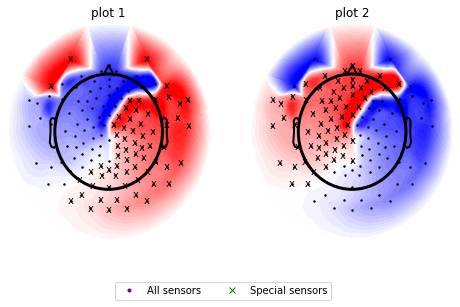

In [7]:
# example code for using ptsa_plot.topoplot

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

from ptsa_plot.ptsa_plot.topo import topoplot

# load channel plot coordinates
with open('./ptsa_plot/ptsa_plot/electrode_layouts/HCGSN128.dat', 'r') as sensorfile:
    angles, radii = sensorfile.readlines()
    sensors = (np.r_[np.array([float(a)
                               for a in angles.strip().split()]), 0],
               np.r_[[float(r) for r in radii.strip().split()], 0])

# examples channels for demonstration
n_channels = 128
channel_indices = np.arange(n_channels)

# just channels in our loaded EEG; use this for your actual plots
# channel_indices = np.array([np.int(c.values.tolist()[1:]) for c in list_eeg['channel']]) - 1 # keep this minus 1 for alignment
# n_channels = len(channel_indices)

cleaned_sensors = tuple(s[channel_indices] for s in sensors)

vmax = 0.6
vmin = -vmax

# create example values to plot
values = np.arange(n_channels) / n_channels * (vmax - vmin) + vmin

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# plot smoothed heat map of sensor values with sensors plotted as dots
topoplot(sensors=cleaned_sensors, values=values,
         axes=axs[0], cmap='bwr', sensor_props={'marker': '.'}, 
         vmin=vmin, vmax=vmax, levels=np.linspace(vmin, vmax, 50),
         labels=np.array(['x'  if v > np.mean(values) else ' ' for v in values]))
axs[0].set_title('plot 1')

# another example plot
topoplot(sensors=cleaned_sensors, values=-values,
         axes=axs[1], cmap='bwr', sensor_props={'marker': '.'}, 
         vmin=vmin, vmax=vmax, levels=np.linspace(vmin, vmax, 50),
         labels=np.array(['x'  if v < np.mean(values) else ' ' for v in values]))
axs[1].set_title('plot 2')

#### Add legend to the plots
marker_dot = plt.plot([], marker=".", ls="", color="purple")[0]
marker_x = plt.plot([], marker="x", ls="", color="green")[0]

fig.legend([marker_dot, marker_x], 
           ['All sensors', 'Special sensors'],
           loc='center', bbox_to_anchor=(0.5, -0.05), ncol=2)